<a href="https://colab.research.google.com/github/Pratster95/Big-Data-and-Machine-Learning-using-Google-Cloud-Platform/blob/master/LinearRegressionPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#import all the libraries
import torch
import torch.nn as nn
import torch.optim as optim #optimizer
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X = np.array([x for x in range(100)]) # 2 D array
X = X.reshape(-1, 1) # vertical 2 columns
Y = 46 + 2*X.flatten() # 1D array, flatten X to make it 1D

In [23]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [24]:
Y

array([ 46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,
        72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122,
       124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200,
       202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226,
       228, 230, 232, 234, 236, 238, 240, 242, 244])

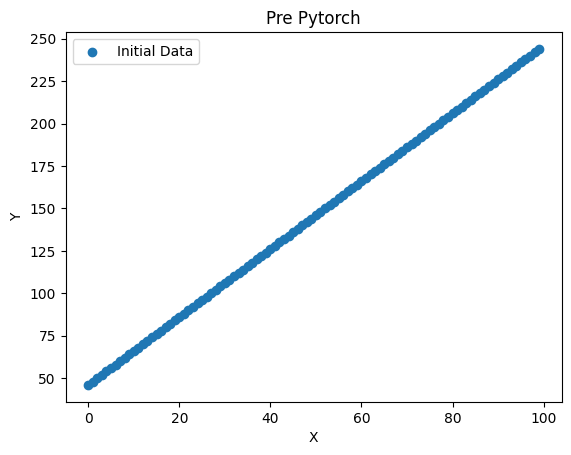

In [25]:
#make scatter plot to visualize it
plt.scatter(X, Y, label='Initial Data')
plt.title('Pre Pytorch')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [26]:
#normalize your data
#normalization is a data prperation technique which is used to improve model performance and training stability. It creates new values that maintain the general distribution and ratios of the source dat. It does this without distorting the general distrbution and ratios of the source data.

X_mean, X_std = X.mean(), X.std()
X_normalized = (X - X_mean) / X_std
Y_mean, Y_std = Y.mean(), Y.std()
Y_normalized = (Y - Y_mean) / Y_std



In [27]:
#turn the data into tensors
#Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
#More info here: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
Y_tensor = torch.tensor(Y_normalized, dtype=torch.float32)


In [28]:
print("X_tensor:", X_tensor)
print("\n")
print("...........................................................")
print("\n")
print("Y_tensor:", Y_tensor)

X_tensor: tensor([[-1.7148],
        [-1.6802],
        [-1.6455],
        [-1.6109],
        [-1.5762],
        [-1.5416],
        [-1.5070],
        [-1.4723],
        [-1.4377],
        [-1.4030],
        [-1.3684],
        [-1.3337],
        [-1.2991],
        [-1.2645],
        [-1.2298],
        [-1.1952],
        [-1.1605],
        [-1.1259],
        [-1.0912],
        [-1.0566],
        [-1.0220],
        [-0.9873],
        [-0.9527],
        [-0.9180],
        [-0.8834],
        [-0.8487],
        [-0.8141],
        [-0.7795],
        [-0.7448],
        [-0.7102],
        [-0.6755],
        [-0.6409],
        [-0.6062],
        [-0.5716],
        [-0.5370],
        [-0.5023],
        [-0.4677],
        [-0.4330],
        [-0.3984],
        [-0.3637],
        [-0.3291],
        [-0.2945],
        [-0.2598],
        [-0.2252],
        [-0.1905],
        [-0.1559],
        [-0.1212],
        [-0.0866],
        [-0.0520],
        [-0.0173],
        [ 0.0173],
        [ 0.0520],
  

In [29]:
X_tensor.shape

torch.Size([100, 1])

In [30]:
Y_tensor.shape

torch.Size([100])

In [31]:
# create a LR class using nn
class LinearRegressionModel(nn.Module):
	def __init__(self, in_features, out_features):
		super().__init__()
		self.linear = nn.Linear(in_features, out_features)
	def forward(self, x): #forward pass
		return self.linear(x).squeeze(1) # converting back to 1D from 2D

In [32]:
#specify in and out features
in_features = 1
out_features = 1
model = LinearRegressionModel(in_features, out_features)


In [33]:
#Mean Squared Error Loss
#Avg squared error bw predicted and actual values
criterion = nn.MSELoss()


In [34]:
#optimizer #SGD
#More info: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
# torch.optim https://pytorch.org/docs/stable/optim.html
optimizer = optim.SGD(model.parameters(), lr=0.1) #lr = learning rate

#how SGD optimizer works
#paramater = parameter - learning rate * gradient


In [35]:
#epochs = how many times are we going to run our model
num_epochs = 30

In [38]:
#iterate over the num_epochs and calculate o/ps using forward pass
for epoch in range(num_epochs):

#forward pass
  outputs = model(X_tensor)

	#calculate loss
  loss = criterion(outputs, Y_tensor) # diff of predicted and expected val.

	#backwardpass and optimization
  optimizer.zero_grad() # clear the gradience
  loss.backward() #compute gradience
  optimizer.step() #update specific weights and parameters

  print(f'Epoch [{epoch + 1}\{num_epochs}], Loss: {loss.item():.2f}')

Epoch [1\30], Loss: 0.00
Epoch [2\30], Loss: 0.00
Epoch [3\30], Loss: 0.00
Epoch [4\30], Loss: 0.00
Epoch [5\30], Loss: 0.00
Epoch [6\30], Loss: 0.00
Epoch [7\30], Loss: 0.00
Epoch [8\30], Loss: 0.00
Epoch [9\30], Loss: 0.00
Epoch [10\30], Loss: 0.00
Epoch [11\30], Loss: 0.00
Epoch [12\30], Loss: 0.00
Epoch [13\30], Loss: 0.00
Epoch [14\30], Loss: 0.00
Epoch [15\30], Loss: 0.00
Epoch [16\30], Loss: 0.00
Epoch [17\30], Loss: 0.00
Epoch [18\30], Loss: 0.00
Epoch [19\30], Loss: 0.00
Epoch [20\30], Loss: 0.00
Epoch [21\30], Loss: 0.00
Epoch [22\30], Loss: 0.00
Epoch [23\30], Loss: 0.00
Epoch [24\30], Loss: 0.00
Epoch [25\30], Loss: 0.00
Epoch [26\30], Loss: 0.00
Epoch [27\30], Loss: 0.00
Epoch [28\30], Loss: 0.00
Epoch [29\30], Loss: 0.00
Epoch [30\30], Loss: 0.00


In [40]:
#Test predictions with new value of X
new_X = 153
new_X_normalized = (new_X - X_mean) / X_std
new_X_tensor = torch.tensor(new_X_normalized, dtype = torch.float32).view(1,-1)
#read here https://docs.google.com/document/d/1B17Nf4x6kIJb9PR-0CwnHeeqx4WXQe7xaFIZhdz2MFU/edit?pli=1&tab=t.rj9r2lq1lbiz (point 11)
model.eval()
with torch.no_grad():
  prediction_normalized = model(new_X_tensor)
#read here for prediction denormalization: https://stackoverflow.com/questions/32888108/denormalization-of-predicted-data-in-neural-networks#:~:text=The%20denormalization%20equation,for%20the%20stdev.
prediction_denormalized = prediction_normalized.item() * Y_std + Y_mean
print(f"Predicted Value for X = {new_X}: {prediction_denormalized}")

Predicted Value for X = 153: 351.9999510993968


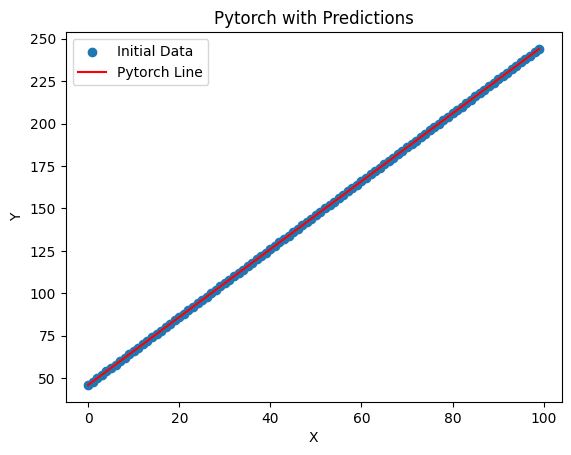

In [41]:
#plotting the predictions (scatter plot)

plt.scatter(X, Y, label='Initial Data')
fit_line = model(X_tensor).detach().numpy() * Y_std + Y_mean
plt.plot(X, fit_line, 'r', label='Pytorch Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pytorch with Predictions')
plt.show()
